In [1]:
from scripts.imports import *

df = pd.read_pickle('dataset.pkl')
df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg_regressed': 'mean',
    'pv_regressed': 'mean',
    'pg_regressed': 'mean',
    'data_quantity': 'max',
    'r2': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean'
}).reset_index()

df_grouped = df_grouped[((df_grouped['FSC'] <= .1)|(df_grouped['FSC'] >= .9))&((df_grouped['TreeSnow'] == 0)|(df_grouped['TreeSnow'] == 1))]
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
df_grouped
# df_grouped
# sns.scatterplot(data = df_grouped, x='pvpg_regressed', y='snr', hue='JointSnow', markersize='data_quantity')
# df[df['date'] == '25/01/2019']

,camera,date,lat,lon,pvpg_regressed,pv_regressed,pg_regressed,data_quantity,r2,snr,FSC,TreeSnow,JointSnow
0,delta_junction,01/08/2021,63.8811,-145.7514,0.066847,0.617161,9.232418,567,0.036058,0.276449,0.0,0.0,0.0
1,delta_junction,02/01/2021,63.8811,-145.7514,0.135763,1.555214,11.455320,406,-0.030915,66.593359,1.0,0.0,1.0
4,delta_junction,04/07/2020,63.8811,-145.7514,0.067235,0.897267,13.345269,269,0.047135,0.246042,0.0,0.0,0.0
5,delta_junction,05/01/2020,63.8811,-145.7514,0.053937,2.110246,39.124568,986,0.035359,72.578885,1.0,0.0,1.0
6,delta_junction,05/11/2018,63.8811,-145.7514,0.150266,0.900521,5.992840,220,-0.072621,1.968729,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,torgnon,26/08/2020,45.8238,7.5609,0.984124,1.431620,1.454715,65,0.680738,19.193950,0.0,0.0,0.0
177,torgnon,27/02/2020,45.8238,7.5609,0.813459,3.079007,3.785082,73,0.561376,118.271029,1.0,0.0,1.0
178,torgnon,27/09/2019,45.8238,7.5609,0.817038,1.221211,1.494680,31,0.643062,0.109817,0.0,0.0,0.0
180,torgnon,30/05/2019,45.8238,7.5609,0.984044,0.972570,0.988340,39,0.495904,0.183994,0.0,0.0,0.0


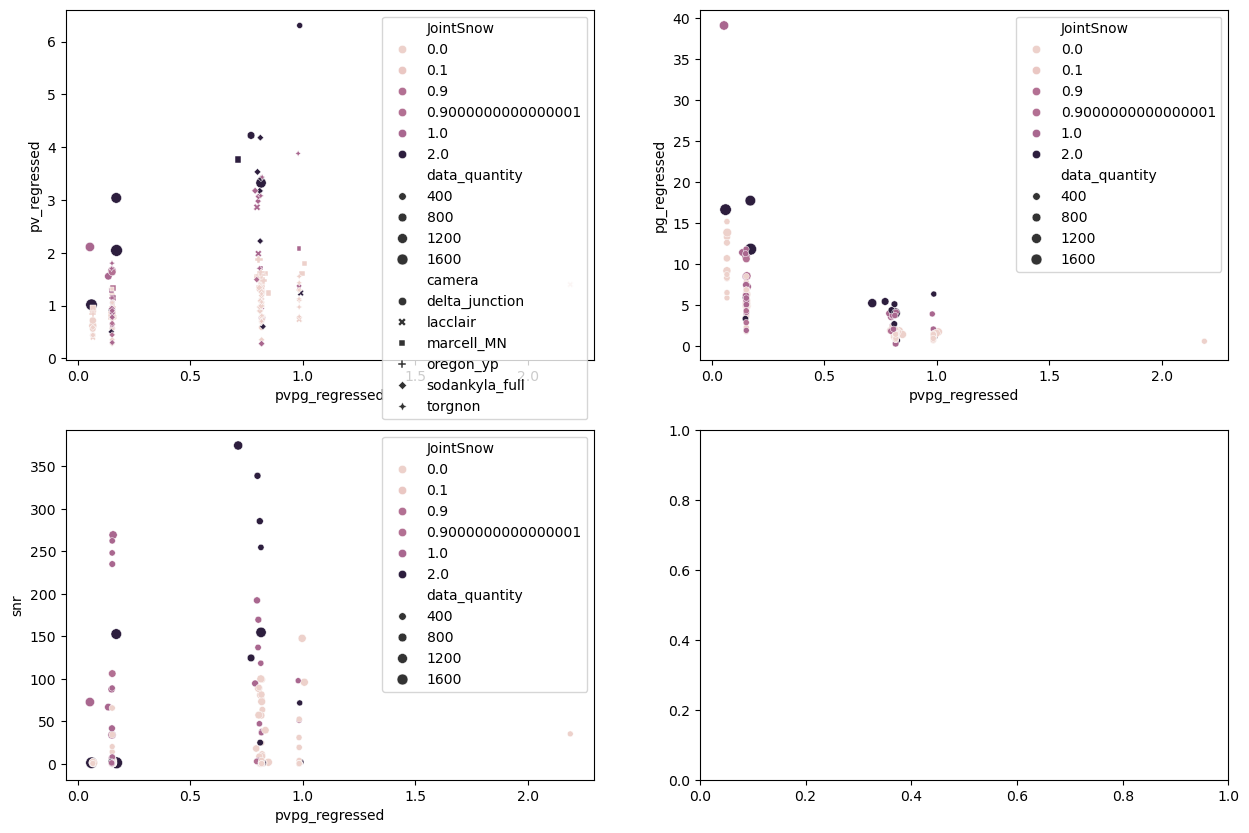

In [3]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = ax.flatten()
sns.scatterplot(data=df_grouped[df_grouped['pvpg_regressed']<20], x='pvpg_regressed', y='pv_regressed', hue='JointSnow', style='camera', size='data_quantity', ax=ax[0])
sns.scatterplot(data=df_grouped[df_grouped['pvpg_regressed']<20], x='pvpg_regressed', y='pg_regressed', hue='JointSnow', size='data_quantity', ax=ax[1])
sns.scatterplot(data=df_grouped[df_grouped['pvpg_regressed']<20], x='pvpg_regressed', y='snr', hue='JointSnow', size='data_quantity', ax=ax[2])
plt.show()
# plt.ylim(0,5)

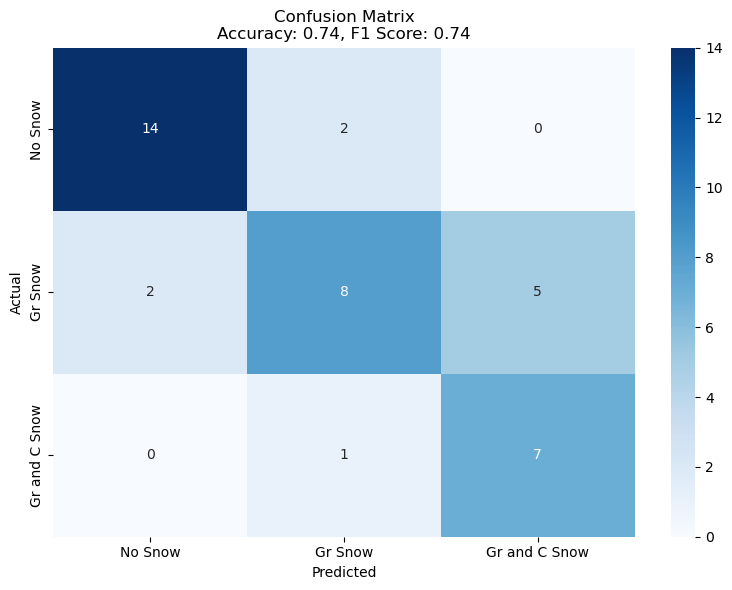

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

df_snr = df_grouped[df_grouped['snr'] > 50].copy()

df_snr['classification'] = df_snr.apply(
    lambda row: 1 if row['pvpg_regressed'] < 0.5 else (0 if row['pv_regressed'] < 2.5 else 2),
    axis=1
)

df_snr['JointSnow'] = df_snr['JointSnow'].astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(df_snr['JointSnow'], df_snr['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(df_snr['JointSnow'], df_snr['classification'])
f1 = f1_score(df_snr['JointSnow'], df_snr['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()

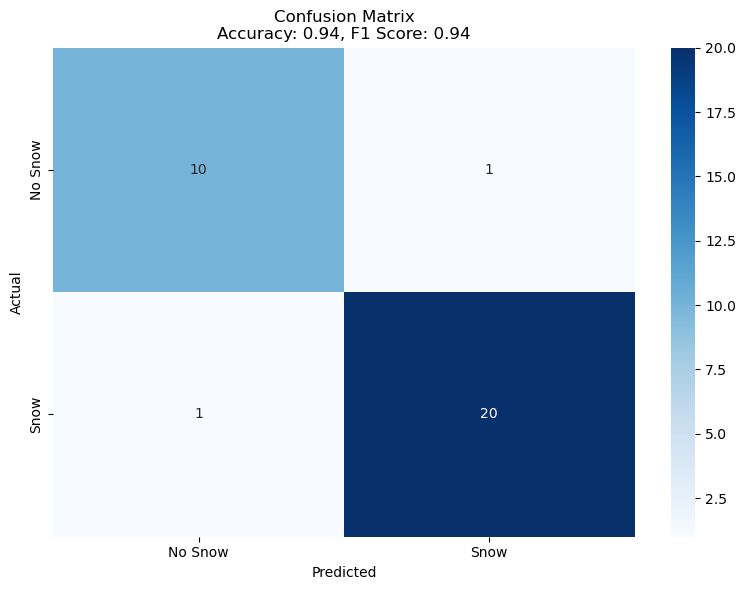

,camera,date,lat,lon,pvpg_regressed,pv_regressed,pg_regressed,data_quantity,r2,snr,FSC,TreeSnow,JointSnow,classification
5,delta_junction,05/01/2020,63.881100,-145.751400,0.053937,2.110246,39.124568,986,0.035359,72.578885,1,0.0,1.0,1
7,delta_junction,06/02/2023,63.881100,-145.751400,0.814517,3.323820,4.080728,1371,0.152288,154.622748,1,1.0,2.0,1
14,delta_junction,12/03/2020,63.881100,-145.751400,0.986370,6.304476,6.391597,28,0.141444,71.535597,1,1.0,2.0,1
24,delta_junction,27/10/2023,63.881100,-145.751400,0.770152,4.222827,5.483111,464,0.163175,124.510144,1,1.0,2.0,1
28,delta_junction,29/10/2022,63.881100,-145.751400,0.170942,3.038800,17.776835,1474,0.262469,152.627877,1,1.0,2.0,1
29,delta_junction,30/04/2022,63.881100,-145.751400,0.153245,1.635289,10.671066,419,0.034982,106.089247,0,0.0,0.9,1
33,lacclair,03/04/2024,46.952100,-71.669600,0.802581,1.983657,2.471597,234,0.424186,169.474089,1,0.0,1.0,0
36,lacclair,03/12/2019,46.952100,-71.669600,0.796559,2.862657,3.593781,279,0.613483,192.267126,1,0.0,1.0,1
50,lacclair,29/05/2022,46.952100,-71.669600,0.819316,1.454097,1.774771,162,0.757534,99.013228,0,0.0,0.0,0
53,marcell_MN,01/02/2020,47.504900,-93.454100,0.150217,1.281833,8.533185,324,0.097961,87.599103,1,0.0,1.0,1


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

df_snr = df_grouped[df_grouped['snr'] > 70].copy()

df_snr['classification'] = df_snr.apply(
    lambda row: 1 if row['pvpg_regressed'] < 0.5 else (0 if row['pv_regressed'] < 2.5 else 1),
    axis=1
)

df_snr['FSC'] = df_snr['FSC'].astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(df_snr['FSC'], df_snr['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(df_snr['FSC'], df_snr['classification'])
f1 = f1_score(df_snr['FSC'], df_snr['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()

df_snr

In [5]:
from scripts.imports import *

df = pd.read_pickle('dataset_1blocks.pkl')
df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg_regressed': 'mean',
    'pv_regressed': 'mean',
    'pg_regressed': 'mean',
    'data_quantity': 'max',
    'r2': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean'
}).reset_index()

df_grouped = df_grouped[((df_grouped['FSC'] <= .1)|(df_grouped['FSC'] >= .9))&((df_grouped['TreeSnow'] == 0)|(df_grouped['TreeSnow'] == 1))]
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
df_grouped
# df_grouped
# sns.scatterplot(data = df_grouped, x='pvpg_regressed', y='snr', hue='JointSnow', markersize='data_quantity')
# df[df['date'] == '25/01/2019']

,camera,date,lat,lon,pvpg_regressed,pv_regressed,pg_regressed,data_quantity,r2,snr,FSC,TreeSnow,JointSnow
0,delta_junction,01/08/2021,63.840559,-145.741168,0.067122,0.718351,10.702203,36,0.012028,0.288152,0.0,0.0,0.0
1,delta_junction,01/08/2021,63.840559,-145.659312,17.918593,3.985074,0.222399,2,0.999980,0.330520,0.0,0.0,0.0
2,delta_junction,01/08/2021,63.849568,-145.741168,0.067053,0.727134,10.844176,80,-0.020021,0.288152,0.0,0.0,0.0
3,delta_junction,01/08/2021,63.858577,-145.741168,0.067051,0.697322,10.399882,66,-0.032291,0.288152,0.0,0.0,0.0
4,delta_junction,01/08/2021,63.867586,-145.741168,0.067116,0.660948,9.847799,39,0.008693,0.288152,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,torgnon,30/11/2018,45.837314,7.593220,0.067105,0.856978,12.770667,5,-0.009903,19.868767,1.0,0.0,1.0
2348,torgnon,30/11/2018,45.846323,7.502725,0.817444,1.341058,1.640551,18,-0.007006,32.256431,1.0,0.0,1.0
2349,torgnon,30/11/2018,45.846323,7.593220,0.815499,1.985966,2.435278,12,0.273306,37.761360,1.0,0.0,1.0
2350,torgnon,30/11/2018,45.855332,7.593220,0.152733,1.602249,10.490499,21,0.650851,42.374294,1.0,0.0,1.0


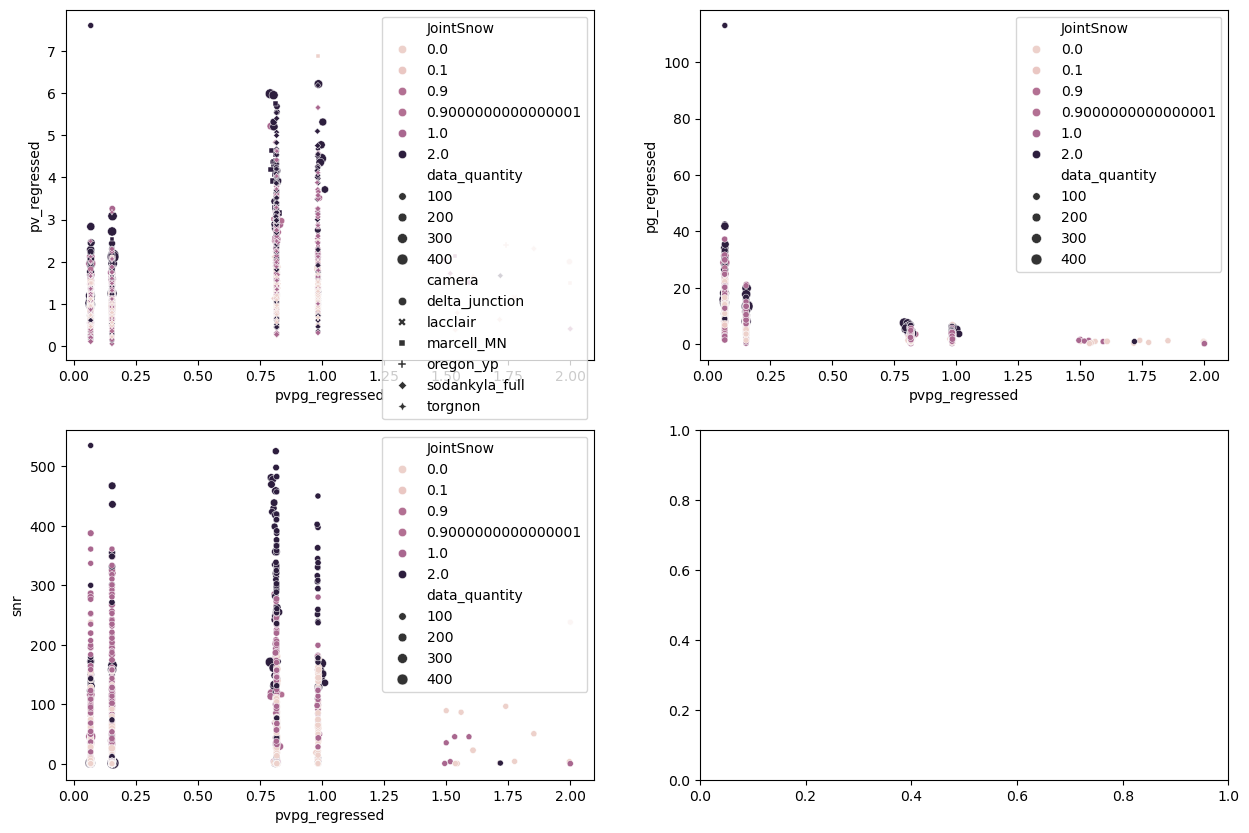

In [22]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = ax.flatten()
sns.scatterplot(data=df_grouped[(df_grouped['pvpg_regressed']<2)&(df_grouped['snr']>0)], x='pvpg_regressed', y='pv_regressed', hue='JointSnow', style='camera', size='data_quantity', ax=ax[0])
sns.scatterplot(data=df_grouped[(df_grouped['pvpg_regressed']<2)&(df_grouped['snr']>0)], x='pvpg_regressed', y='pg_regressed', hue='JointSnow', size='data_quantity', ax=ax[1])
sns.scatterplot(data=df_grouped[(df_grouped['pvpg_regressed']<2)&(df_grouped['snr']>0)], x='pvpg_regressed', y='snr', hue='JointSnow', size='data_quantity', ax=ax[2])
plt.show()
# plt.ylim(0,5)

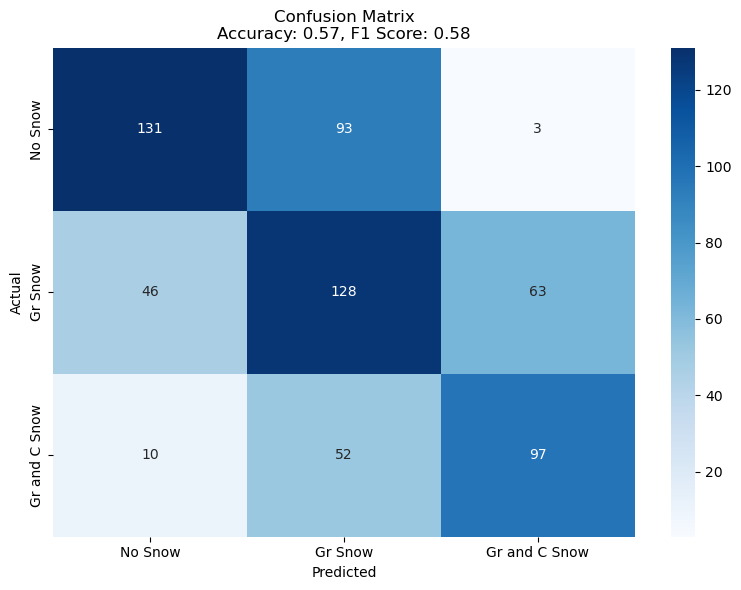

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

df_snr = df_grouped[df_grouped['snr'] > 50].copy()

df_snr['classification'] = df_snr.apply(
    lambda row: 1 if row['pvpg_regressed'] < 0.5 else (0 if row['pv_regressed'] < 2.5 else 2),
    axis=1
)

df_snr['JointSnow'] = df_snr['JointSnow'].astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(df_snr['JointSnow'], df_snr['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(df_snr['JointSnow'], df_snr['classification'])
f1 = f1_score(df_snr['JointSnow'], df_snr['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()

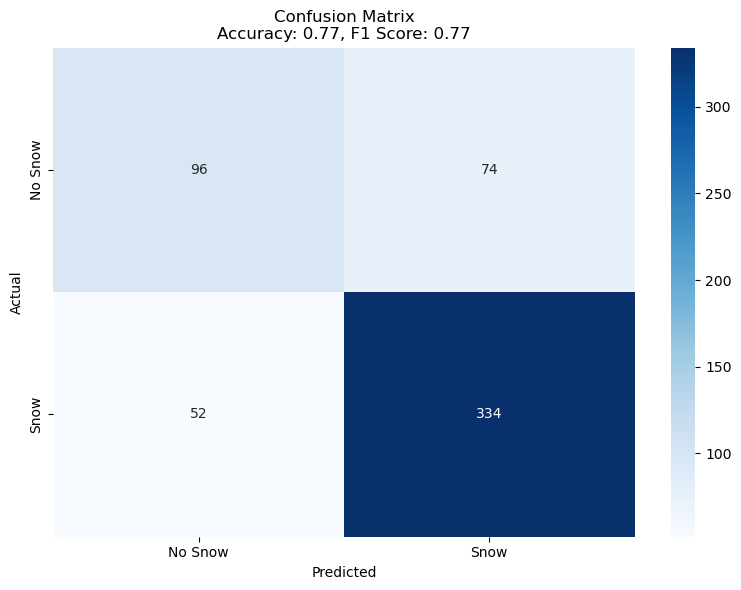

,camera,date,lat,lon,pvpg_regressed,pv_regressed,pg_regressed,data_quantity,r2,snr,FSC,TreeSnow,JointSnow,classification
18,delta_junction,02/01/2021,63.840559,-145.761632,0.153036,1.511402,9.876133,16,0.129398,92.157416,1,0.0,1.0,1
19,delta_junction,02/01/2021,63.849568,-145.823024,0.816838,2.452977,3.003017,2,0.991613,90.561363,1,0.0,1.0,0
20,delta_junction,02/01/2021,63.849568,-145.761632,0.152895,1.152895,7.540452,1,-inf,90.875587,1,0.0,1.0,1
21,delta_junction,02/01/2021,63.858577,-145.843488,0.152964,1.346686,8.803942,11,0.140286,89.332146,1,0.0,1.0,1
22,delta_junction,02/01/2021,63.858577,-145.823024,0.152895,1.076447,7.040452,1,NaN,93.019798,1,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,torgnon,27/02/2020,45.810286,7.502725,0.817483,4.625771,5.658556,15,-0.230569,145.524963,1,0.0,1.0,1
2312,torgnon,27/02/2020,45.810286,7.515652,0.067126,1.360524,20.268155,9,0.065064,108.446426,1,0.0,1.0,1
2313,torgnon,27/02/2020,45.819295,7.502725,0.816683,4.034149,4.939674,3,-1.152139,145.524963,1,0.0,1.0,1
2314,torgnon,27/02/2020,45.819295,7.515652,0.983140,2.856614,2.905601,12,0.909060,123.277841,1,0.0,1.0,1


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

df_snr = df_grouped[df_grouped['snr'] > 70].copy()

df_snr['classification'] = df_snr.apply(
    lambda row: 1 if row['pvpg_regressed'] < 0.5 else (0 if row['pv_regressed'] < 2.5 else 1),
    axis=1
)

df_snr['FSC'] = df_snr['FSC'].astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(df_snr['FSC'], df_snr['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(df_snr['FSC'], df_snr['classification'])
f1 = f1_score(df_snr['FSC'], df_snr['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()

df_snr

# Five Sites

In [7]:
from scripts.FSC_dataframe_phoreal import *

df=pd.read_pickle('five_sites_data.pkl')
loc_df = df[df['Confidence'] == 1].reset_index(drop=True)

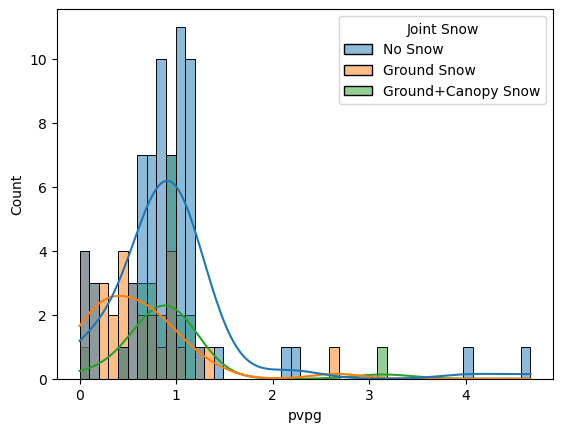

In [17]:
plt.figure()
plot = sns.histplot(loc_df[(loc_df['pvpg']<5)], x='pvpg', hue='Joint Snow', kde=True, palette='tab10', binwidth=.1)

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
legend = plot.legend_
# Set the new labels
new_labels = ['No Snow', 'Ground Snow', 'Ground+Canopy Snow']
for text, new_label in zip(legend.get_texts(), new_labels):
    text.set_text(new_label)

# plt.savefig('./images/five_sites/pvpg_10km.png')
plt.show()

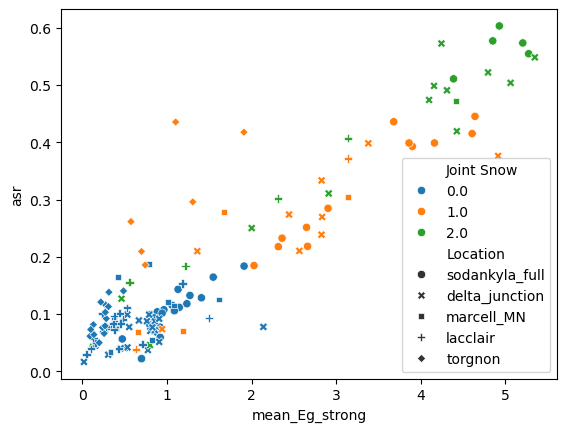

In [17]:
sns.scatterplot(loc_df, x='mean_Eg_strong', y = 'asr' ,hue='Joint Snow', palette='tab10', style='Location')
plt.legend(loc='lower right')
# plt.savefig('./images/five_sites/10km_asr_Eg.png')
plt.show()

# New scripts and functions

array(['15/11/2018'], dtype=object)

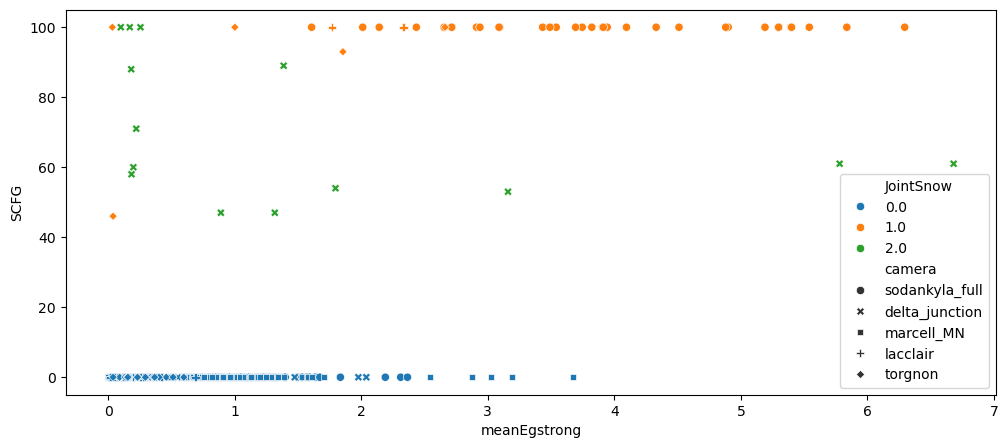

In [17]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')
loc_df = df[(df['Confidence'] == 1)&(df['msw']<5.1)&(df['date']!='26/03/2019')]

plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'SCFG' ,hue='JointSnow', palette='tab10', style='camera')

loc_df[(loc_df['camera']=='delta_junction')&(loc_df['SCFG'] <= 95)&(loc_df['SCFG'] >= 20)]['date'].unique()

,camera,date,pvpg,y_strong,y_weak,x_strong,x_weak,longitude,latitude,meanEgstrong,...,data_quantity,FSC,TreeSnow,JointSnow,Confidence,MxD10A1F,cc,MxD10A1,SCFG,SCFV
702,delta_junction,15/11/2018,-5.768161e-01,0.418348,NaN,7.252717e-01,NaN,-145.847939,63.8386,0.221779,...,4.0,1.0,1.0,2.0,1.0,77.0,NaN,77.0,71.0,43.0
703,delta_junction,15/11/2018,-1.457407e+00,1.043939,NaN,7.162991e-01,NaN,-145.847939,63.8436,0.198897,...,3.0,1.0,1.0,2.0,1.0,75.5,NaN,75.5,60.0,40.0
704,delta_junction,15/11/2018,-1.856489e+00,1.036329,NaN,5.582201e-01,NaN,-145.779794,63.8636,0.255298,...,5.0,1.0,1.0,2.0,1.0,82.0,39.251999,82.0,100.0,24.0
705,delta_junction,15/11/2018,-1.419103e+00,NaN,0.577842,NaN,4.071882e-01,-145.768436,63.8636,NaN,...,3.0,1.0,1.0,2.0,1.0,80.0,41.5854,80.0,100.0,23.0
706,delta_junction,15/11/2018,-8.407083e-02,0.610896,NaN,7.266445e+00,NaN,-145.779794,63.8686,0.170759,...,2.0,1.0,1.0,2.0,1.0,76.0,36.949902,76.0,100.0,24.0
707,delta_junction,15/11/2018,-2.502399e-17,0.671274,NaN,2.682524e+16,NaN,-145.768436,63.8686,0.099733,...,2.0,1.0,1.0,2.0,1.0,81.0,41.4743,81.0,100.0,23.0
708,delta_junction,15/11/2018,-2.280704e+00,1.153381,NaN,5.057129e-01,NaN,-145.711649,63.8686,0.184580,...,3.0,1.0,1.0,2.0,1.0,73.5,37.466301,73.5,58.0,48.0
709,delta_junction,15/11/2018,-8.493039e-02,0.397648,NaN,4.682047e+00,NaN,-145.768436,63.8736,0.182006,...,2.0,1.0,1.0,2.0,1.0,77.5,34.439999,77.5,88.0,24.0
710,delta_junction,15/11/2018,-9.254150e-01,2.340943,NaN,2.529614e+00,NaN,-145.711649,63.8736,1.386643,...,4.0,1.0,1.0,2.0,1.0,75.0,24.656,75.0,89.0,41.0
711,delta_junction,15/11/2018,-3.913045e-01,1.388838,NaN,3.549251e+00,NaN,-145.700291,63.8836,3.159575,...,2.0,1.0,1.0,2.0,1.0,79.0,31.012203,79.0,53.0,34.0


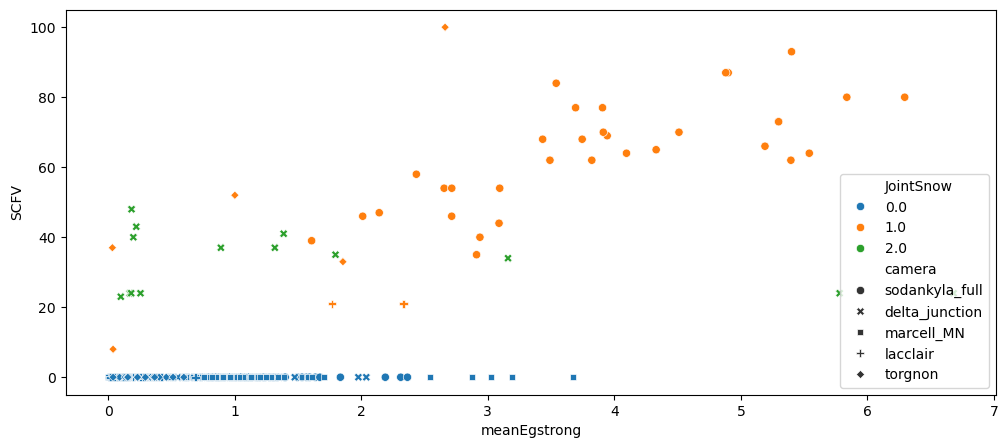

In [5]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')
loc_df = df[(df['Confidence'] == 1)&(df['msw']<5.1)&(df['date']!='26/03/2019')]

plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'SCFV' ,hue='JointSnow', palette='tab10', style='camera')

# loc_df[(loc_df['camera']=='marcell_MN')&(loc_df['SCFV'] <= 100)]['date'].unique()
loc_df[(loc_df['JointSnow']==2)&(loc_df['SCFV']<=100)]

No 26/3/2019


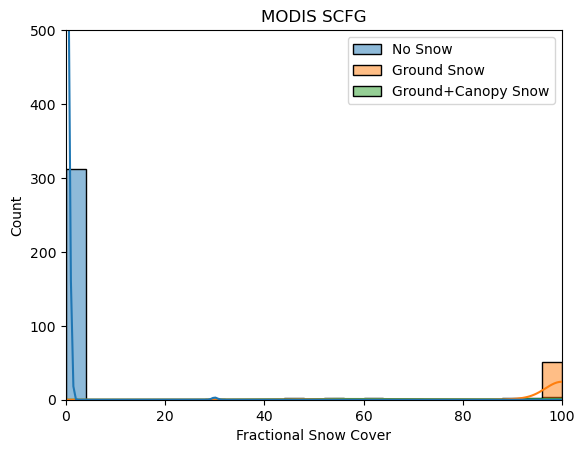

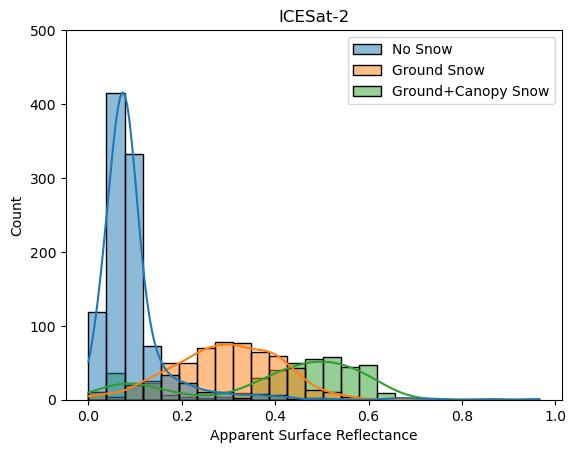

In [3]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

for P in range(1,2):

    if P == 0:
        print('All')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)].reset_index(drop=True)
    # Filter the dataframe
    
    if P == 1:
        print('No 26/3/2019')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)&(df['date'] != '26/03/2019')&(df['date'] != '24/12/2019')].reset_index(drop=True)

    # elif P == 2:
    #     print('No Marcell msw < 2.1')
    #     loc_df = df[(df['msw'] < 2.1) & (df['Confidence'] == 1)&(df['camera'] != 'marcell_MN')].reset_index(drop=True)
        
    
    hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
    
    titles = ['MODIS SCFG', 'ICESat-2']
    x_axis = ['Fractional Snow Cover', 'Apparent Surface Reflectance']
    for i, ABC in enumerate(['SCFG', 'asr']):

        # if ABC == 'MxD10A1F':
        
        Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC ,hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)

        # else:
        #     Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC ,hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)
        
        # Get the current legend and its handles
        legend = Plot.get_legend()
        handles = legend.legend_handles
        
        # print(labels)
        new_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels.keys()]
        
        Plot.legend(handles=handles, labels=new_labels, loc='upper right')
        plt.ylim(0,500)
        if ABC == 'SCFG':
            plt.xlim(0,100)
        
        # Extracting the KDE lines from the seaborn plot
        lines = Plot.get_lines()
        
        # Getting the x and y data for each KDE line
        kde_data = {}
        for line in lines:
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()
            kde_data[label] = (x_data, y_data)
    
        plt.title(titles[i])
        plt.xlabel(x_axis[i])
        # plt.savefig(f'./images/hist_vector_{ABC}.svg')
        plt.show()
    
    # FI = hist_plot(loc_df, hue_labels, X='MxD10A1F', Hue='JointSnow', save=None, plot=True, xlim=(0,100), ylim=None, preset=False)#, save='/500mres/meanEvstrong_hist_msw2')
    # FI = hist_plot(loc_df, hue_labels, X='asr', Hue='JointSnow', save=None, plot=True, ylim=None, preset=False)
    # print(FI)

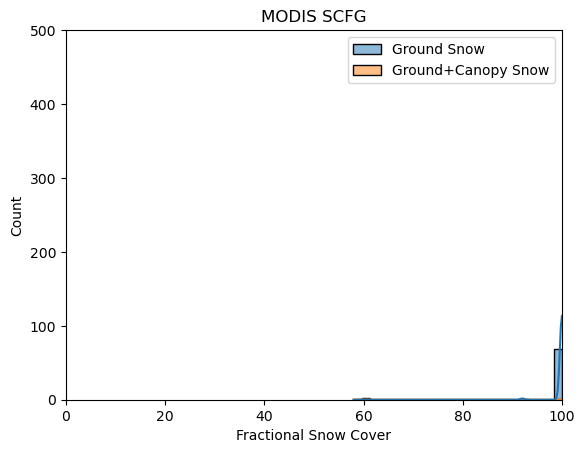

KS test for MODIS SCFG (JointSnow 1 vs 2):
Statistic: 0.7500, P-value: 1.0495e-02
The distributions are significantly different (p < 0.05).




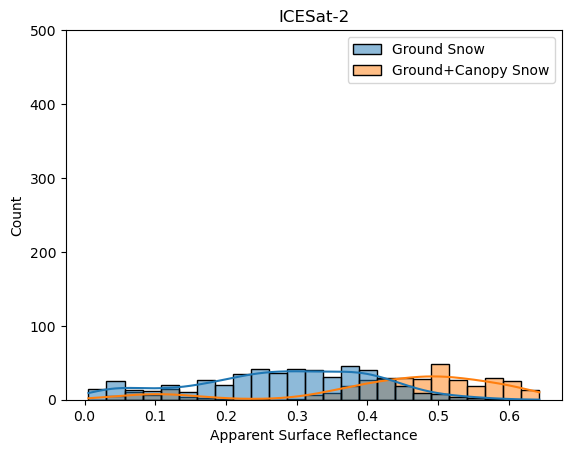

KS test for ICESat-2 (JointSnow 1 vs 2):
Statistic: 0.5658, P-value: 4.5028e-63
The distributions are significantly different (p < 0.05).




In [2]:
from scipy.stats import ks_2samp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

for P in range(1, 2):

    if P == 0:
        print('All')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)].reset_index(drop=True)
    
    if P == 1:
        # print('No 26/3/2019')
        loc_df = df[(df['msw'] < 2.1) & (df['Confidence'] == 1) &(df['JointSnow']!=0)].reset_index(drop=True)
    
    hue_labels = {'1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
    titles = ['MODIS SCFG', 'ICESat-2']
    x_axis = ['Fractional Snow Cover', 'Apparent Surface Reflectance']
    
    for i, ABC in enumerate(['SCFG', 'asr']):
        # Plotting
        Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC, hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)

        # Update legend labels
        legend = Plot.get_legend()
        handles = legend.legend_handles
        new_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels.keys()]
        Plot.legend(handles=handles, labels=new_labels, loc='upper right')
        
        plt.ylim(0, 500)
        if ABC == 'SCFG':
            plt.xlim(0, 100)

        plt.title(titles[i])
        plt.xlabel(x_axis[i])
        plt.show()

        # Statistical comparison between JointSnow = 1 and JointSnow = 2
        data_js1 = loc_df[(loc_df['JointSnow'] == 1) & (loc_df[ABC] <= 100)][ABC].values
        data_js2 = loc_df[(loc_df['JointSnow'] == 2) & (loc_df[ABC] <= 100)][ABC].values
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, p_value = ks_2samp(data_js1, data_js2)
        print(f"KS test for {titles[i]} (JointSnow 1 vs 2):")
        print(f"Statistic: {ks_stat:.4f}, P-value: {p_value:.4e}")
        
        # Interpret the p-value
        if p_value < 0.05:
            print("The distributions are significantly different (p < 0.05).")
        else:
            print("No significant difference between the distributions (p ≥ 0.05).")
        print("\n")
